# **Red wine quality classification using TPOT**

In [0]:
#importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path='/content/drive/My Drive/Auto ML datasets/winequality-red.csv'
df= pd.read_csv(path)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


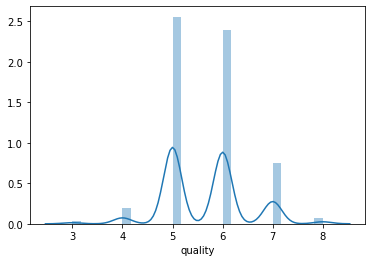

In [7]:
sns.distplot(df['quality'])

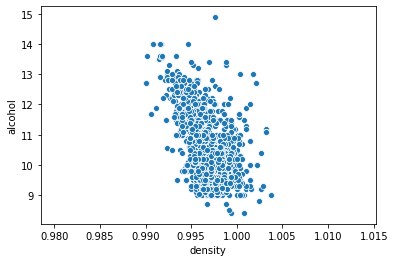

In [8]:
sns.scatterplot(x='density', y='alcohol', data=df)

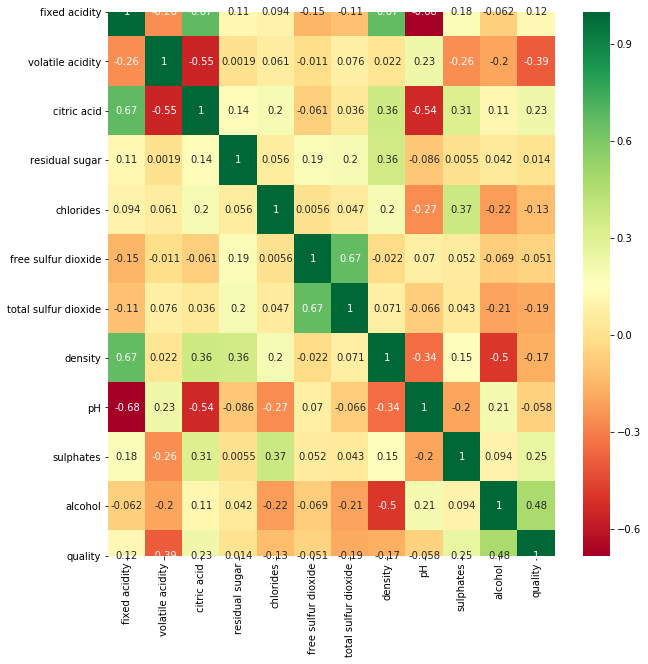

In [9]:
#correlation matrix
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [10]:
#seperate X and Y from the dataset
X= df.drop(['quality'], axis=1)
Y= df['quality']
print(X.shape)
print(Y.shape)

(1599, 11)
(1599,)


In [0]:
#using sklearn to split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

### Lets build TPOT model

In [12]:
#install TPOT
pip install tpot

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 153kB 57.1MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
  Created wheel for tpot: filename=TPOT-0.11.0-cp36-none-any.whl size=75684 sha256=3526956ae722b291062b98262eeab8d733b472946dcc7bd0ff3f19d82bcf7725
  Stored in directory: /root/.cache/pip/wheels/5e/79/3b/49ccea9a29f28d0cdecbca22d71515c23bf45e1e65bc925cb8
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11955 sha256=9e1bd78d4ceaa0bb84df9f77f8e5867181850bc17b8cf2667496110cc75aa747
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built tpot stopit
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


In [0]:
from tpot import TPOTClassifier

In [0]:
tpot= TPOTClassifier(verbosity=3,
                     scoring='accuracy',
                     random_state=25,
                     periodic_checkpoint_folder='tpot_mushroom_results.txt',
                     n_jobs=-1,
                     generations=5,
                     population_size=10,
                     early_stop= 5,
                     max_time_mins=5,
                     max_eval_time_mins=2)

In [14]:
tpot.fit(X_train, Y_train)
print('TPOT accuracy: {:.2f}%'.format(tpot.score(X_test, Y_test)*100))

31 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 1 - Current Pareto front scores:
-1	0.6265802438806182	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.3, ExtraTreesClassifier__min_samples_leaf=6, ExtraTreesClassifier__min_samples_split=15, ExtraTreesClassifier__n_estimators=100)
-2	0.6601330796717789	RandomForestClassifier(RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.3, RandomForestClassifier__min_samples_leaf=3, RandomForestClassifier__min_samples_split=14, RandomForestClassifier__n_estimators=100), RandomForestClassifier__bootstrap=Fal

In [0]:
#TPOT accuracy: 62.19%